Uma caixa possui $4$ compartimentos, como mostrado na Figura a seguir. No compartimento $0$ há uma aranha, assim como no compartimento $3$. Uma mosca pousa em um dos compartimentos. A cada minuto (se ela ainda não foi comida) a mosca decide se continua no mesmo compartimento ou se vai para um dos compartimentos vizinhos. A probabilidade de ficar no mesmo compartimento é $0,4$ e a probabilidade de ir para um compartimento vizinho é $0,6$. Se a mosca vai para onde há uma aranha, ela não sai mais (fica presa na teia).

Calcular a probabilidade de a mosca cair em uma teia exatamente no terceiro minuto se ela pousou no compartimento $1$, o número médio de passos e a probabilidade de absorção associada a cada estado.

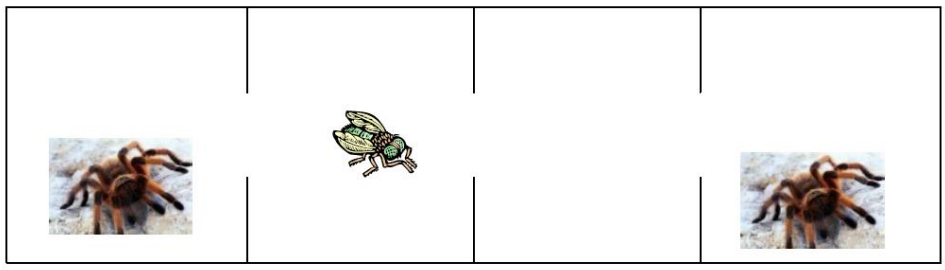

In [2]:
from IPython.display import display, Image
display(Image(filename='/content/AranhaMosca.png', height=100, embed=True))

In [3]:
import numpy as np

In [133]:
simulacoes = 100000   # Número de simulações

# Como há menos compartimentos que a mosca pode pousar até ficar presa na teia,
# e a probabilidade de ficar no mesmo compartimento é maior que a de transição,
# a quantidade de passos até o estado absorvente pode ser alta. Por isso, será
# analisada até o passo 25 da Cadeia de Markov.

# Neste caso, considerando a mosca presa na teia em 'exatamente' 3 minutos, não
# há possibilidades de absorção para os passos anteriores.

tempoMorte = 3              # Instante em que a mosca deve prender na teia.
tamanhoCadeia = 25          # Número de transições da cadeia de Markov.
passosAbsorcao = [[], []]   # Número de passos até se prender na teia.
estadoAbsorvente = [0, 3]   # Compartimento que possuem uma aranha.

# Como mencionado o caso de 'exatamente' 3 minutos, há uma cadeia auxiliar
# guardando o compartimento da mosca após esse passo.
cadeiaAuxiliar = []                       # Estados no passo tempoMorte.
cadeiaMarkov = np.zeros(simulacoes, int)  # Estados após tamanhoCadeia passos.
matrizTransicoes = np.array([[ 1,   0,   0,   0 ],
                             [0.3, 0.4, 0.3,  0 ],
                             [ 0,  0.3, 0.4, 0.3],
                             [ 0,   0,   0,   1 ]])

for simulacao in np.arange(0, simulacoes, 1):
  estadoInicial = np.argmax(np.cumsum([0, 0.5, 0.5, 0]) > np.random.uniform(0, 1))
  cadeia_Markov = np.zeros(tamanhoCadeia, int)
  cadeia_Markov[0] = estadoInicial

  for passo in np.arange(1, tamanhoCadeia, 1):
    # Probabilidades de Transição para o estado atual da Cadeia de Markov:
    limiarTransicao = np.cumsum(matrizTransicoes[cadeia_Markov[passo - 1]])
    transicao = np.random.uniform(0, 1)

    # Decisão da próxima sala que o rato irá se mover.
    # Se chegar na sala onde está o gato, encerra a simulação atual.
    compartimentoTransicao = np.argmax(limiarTransicao > transicao)
    cadeia_Markov[passo] = compartimentoTransicao

    if (compartimentoTransicao in estadoAbsorvente):
      # Verificação se a absorção ocorre exatamente no minuto 3:
      if passo == tempoMorte: cadeiaAuxiliar.append(passo)
      if sum(len(lista) for lista in passosAbsorcao) != simulacao: passosAbsorcao[estadoInicial - 1].append(passo)
      break

  # Como há dois estados absorventes, a cadeiaMarkov será composta apenas pelos
  # compartimentos absorventes.
  cadeiaMarkov[simulacao] = cadeia_Markov[-1]

# Cálculo das Probabilidade por Monte Carlo:
probabilidade = np.sum(np.isin(cadeiaAuxiliar, estadoAbsorvente))/simulacoes
print(f'A probabilidade de a mosca pousar na teia em exatamente {tempoMorte} minutos é de {probabilidade:.2%}.\n')
for passo in range(0, len(passosAbsorcao)):
  print(f'Média de {np.mean(passosAbsorcao[passo]):.1f} passos para absorção para o compartimento {passo}.')

A probabilidade de a mosca pousar na teia em exatamente 3 minutos é de 14.72%.

Média de 3.3 passos para absorção para o compartimento 0.
Média de 3.3 passos para absorção para o compartimento 1.
